# Zomato Data project Analysis

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("C:/Users/Madhuri/Downloads/Zomato data  (1).csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [11]:
df.tail(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
138,Sri Murari Family Restaurant,No,No,2.9/5,0,250,Dining
139,Aramane Donne Biriyani,No,No,2.9/5,0,150,Dining
140,Darkolates,No,No,3.3/5,0,200,Dining
141,Swaada Healthy Kitchen,No,No,3.3/5,0,350,Dining
142,Gawdaru Mane Beriyani,No,No,3.3/5,0,300,Dining
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [16]:
def handleRate(value):
    value = str(value).split("/")
    value = value[0];
    return float(value)
df['rate']=df['rate'].apply(handleRate)
print(df)



                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [20]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of resturant')

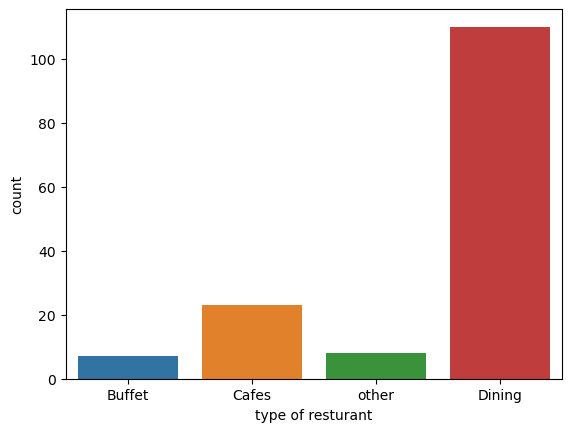

In [21]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of resturant")

# conclusion - majority of the resturant falls in dinning category

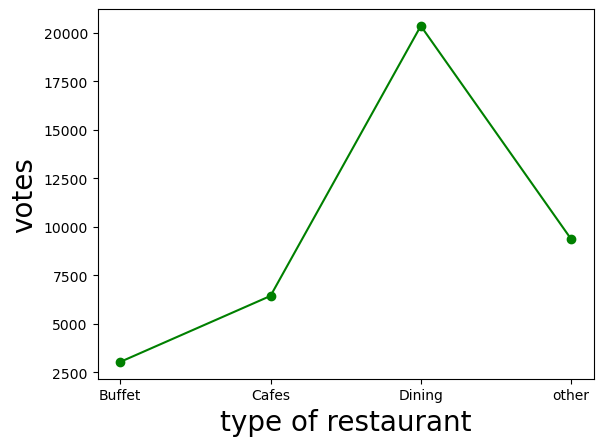

In [28]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'vote': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("type of restaurant", c="black", size=20)
plt.ylabel("votes", c="black", size=20)
plt.show()

# conclusion - dinning resturants has recieved maximum votes

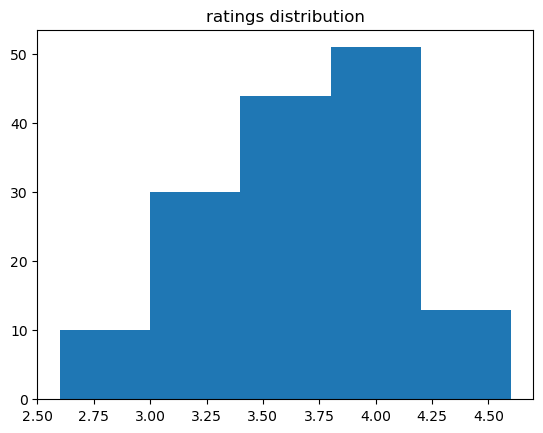

In [35]:
plt.hist(df['rate'],bins = 5)
plt.title("ratings distribution")
plt.show()

# conclusion - the majority resturants received ratings from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

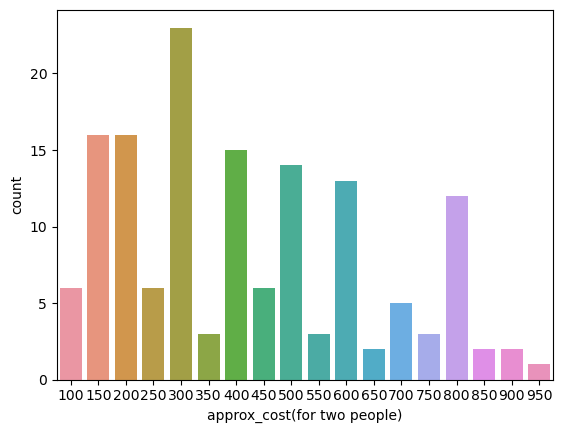

In [40]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

# conclusion -the majority of couple prefeer resturants with an approxmate cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

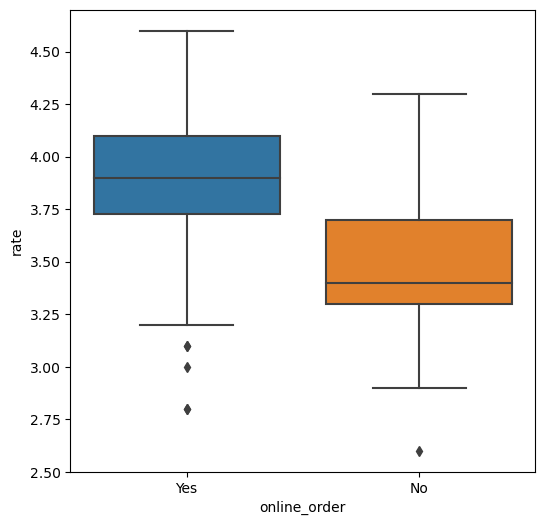

In [41]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order', y = 'rate',data= df)

# conclusion -offline oreder recevied lower rating in comparison to online order

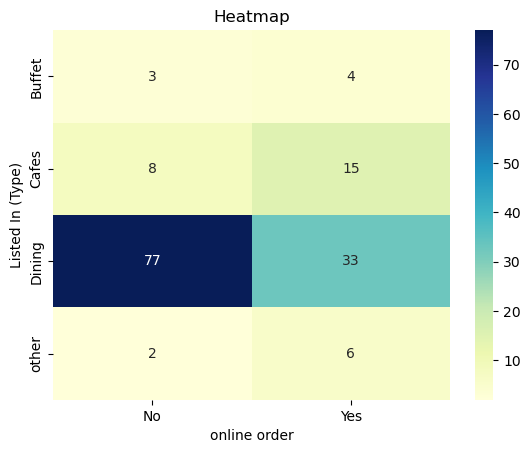

In [47]:
pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title("Heatmap")
plt.xlabel("online order")
plt.ylabel("Listed In (Type)")
plt.show()

# conclusion - Dinng restaurants primarliy accept offline orders, whereas cafes primarily receive online orders. this suggest that clients preferance order in person at restaurants, but prefer online ordering at cafes.